In [1]:
'''
【课程1.2】  分布分析
'''

'\n【课程1.2】  分布分析\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

房屋编码      int64
小区       object
朝向       object
房屋单价      int64
参考首付    float64
参考总价    float64
经度      float64
纬度      float64
dtype: object
-------
数据长度为75条


,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


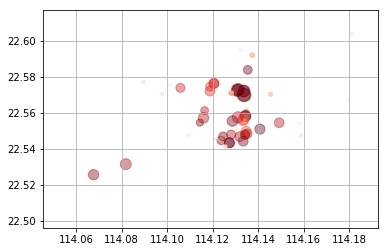

In [9]:
# 数据读取

data = pd.read_csv('C:/Users/hp/Desktop/深圳罗湖二手房信息.csv',engine = 'python')
plt.scatter(data['经度'],data['纬度'],  # 按照经纬度显示
            s = data['房屋单价']/500,  # 按照单价显示大小
            c = data['参考总价'],  # 按照总价显示颜色
            alpha = 0.4, cmap = 'Reds')  
plt.grid()
print(data.dtypes)
print('-------\n数据长度为%i条' % len(data))
data.head()
# 通过数据可见，一共8个字段
# 定量字段：房屋单价，参考首付，参考总价，*经度，*纬度，*房屋编码
# 定性字段：小区，朝向

In [12]:
# 极差：max-min
# 只针对定量字段

def d_range(df,*cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return (krange)
# 创建函数求极差

key1 = '参考首付'
key2 = '参考总价'
dr = d_range(data,key1,key2)
print('%s极差为 %f \n%s极差为 %f' % (key1, dr[0], key2, dr[1]))
# 求出数据对应列的极差

参考首付极差为 52.500000 
参考总价极差为 175.000000


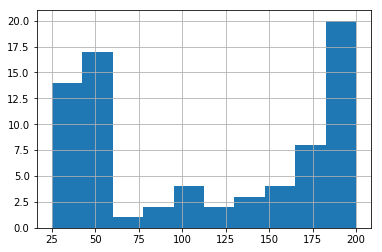

In [13]:
# 频率分布情况 - 定量字段
# ① 通过直方图直接判断分组组数

data[key2].hist(bins=10)
# 简单查看数据分布，确定分布组数 → 一般8-16即可
# 这里以10组为参考

In [16]:
# 频率分布情况 - 定量字段
# ② 求出分组区间

gcut = pd.cut(data[key2],10,right=False)
gcut_count = gcut.value_counts(sort=False)  # 不排序
data['%s分组区间' % key2] = gcut.values
print(gcut,'\n------')
print(gcut_count)
data.head()
# pd.cut(x, bins, right)：按照组数对x分组，且返回一个和x同样长度的分组dataframe，right → 是否右边包含，默认True
# 通过groupby查看不同组的数据频率分布
# 给源数据data添加“分组区间”列

0         [42.5, 60.0)
1         [25.0, 42.5)
2         [42.5, 60.0)
3         [25.0, 42.5)
4       [165.0, 182.5)
5         [42.5, 60.0)
6         [60.0, 77.5)
7         [42.5, 60.0)
8     [182.5, 200.175)
9        [95.0, 112.5)
10    [182.5, 200.175)
11      [165.0, 182.5)
12       [95.0, 112.5)
13      [130.0, 147.5)
14    [182.5, 200.175)
15    [182.5, 200.175)
16      [130.0, 147.5)
17    [182.5, 200.175)
18    [182.5, 200.175)
19    [182.5, 200.175)
20    [182.5, 200.175)
21    [182.5, 200.175)
22        [42.5, 60.0)
23        [25.0, 42.5)
24      [112.5, 130.0)
25      [112.5, 130.0)
26    [182.5, 200.175)
27        [25.0, 42.5)
28        [25.0, 42.5)
29        [25.0, 42.5)
            ...       
45    [182.5, 200.175)
46        [42.5, 60.0)
47        [25.0, 42.5)
48        [42.5, 60.0)
49        [42.5, 60.0)
50    [182.5, 200.175)
51        [42.5, 60.0)
52        [42.5, 60.0)
53    [182.5, 200.175)
54        [42.5, 60.0)
55      [147.5, 165.0)
56      [147.5, 165.0)
57        [

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)"


In [20]:
# 频率分布情况 - 定量字段
# ③  求出目标字段下频率分布的其他统计量 → 频数，频率，累计频率

r_zj = pd.DataFrame(gcut_count)
print (r_zj)
r_zj.rename(columns ={gcut_count.name:'频数'}, inplace = True)  # 修改频数字段名
print (r_zj.head())
r_zj['频率'] = r_zj / r_zj['频数'].sum()  # 计算频率
print (r_zj)
r_zj['累计频率'] = r_zj['频率'].cumsum()  # 计算累计频率
r_zj['频率%'] = r_zj['频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示频率
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示累计频率
r_zj.style.bar(subset=['频率','累计频率'], color='green',width=100)
# 可视化显示

                  参考总价
[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
               频数
[25.0, 42.5)   14
[42.5, 60.0)   17
[60.0, 77.5)    1
[77.5, 95.0)    2
[95.0, 112.5)   4
                  频数        频率
[25.0, 42.5)      14  0.186667
[42.5, 60.0)      17  0.226667
[60.0, 77.5)       1  0.013333
[77.5, 95.0)       2  0.026667
[95.0, 112.5)      4  0.053333
[112.5, 130.0)     2  0.026667
[130.0, 147.5)     3  0.040000
[147.5, 165.0)     4  0.053333
[165.0, 182.5)     8  0.106667
[182.5, 200.175)  20  0.266667


,频数,频率,累计频率,频率%,累计频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.0133333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.0266667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.0533333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.0266667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.04,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.0533333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1,26.67%,100.00%


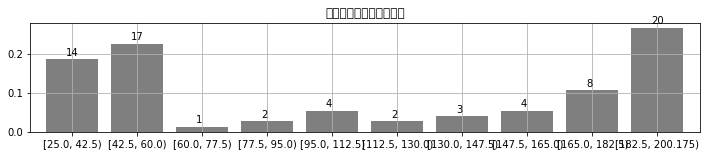

In [21]:
# 频率分布情况 - 定量字段
# ④ 绘制频率直方图

r_zj['频率'].plot(kind = 'bar',
                 width = 0.8,
                 figsize = (12,2),
                 rot = 0,
                 color = 'k',
                 grid = True,
                 alpha = 0.5)
plt.title('参考总价分布频率直方图')
# 绘制直方图

x = len(r_zj)
y = r_zj['频率']
m = r_zj['频数']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i' % k, color = 'k')
# 添加频数标签

In [22]:
# 频率分布情况 - 定性字段
# ① 通过计数统计判断不同类别的频率

cx_g = data['朝向'].value_counts(sort=True)
print(cx_g)
# 统计频率

r_cx = pd.DataFrame(cx_g)
r_cx.rename(columns ={cx_g.name:'频数'}, inplace = True)  # 修改频数字段名
r_cx['频率'] = r_cx / r_cx['频数'].sum()  # 计算频率
r_cx['累计频率'] = r_cx['频率'].cumsum()  # 计算累计频率
r_cx['频率%'] = r_cx['频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示频率
r_cx['累计频率%'] = r_cx['累计频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示累计频率
r_cx.style.bar(subset=['频率','累计频率'], color='#d65f5f',width=100)
# 可视化显示

南北    29
南     20
东      8
东南     5
西南     4
北      4
西北     3
东北     1
东西     1
Name: 朝向, dtype: int64


,频数,频率,累计频率,频率%,累计频率%
南北,29,0.386667,0.386667,38.67%,38.67%
南,20,0.266667,0.653333,26.67%,65.33%
东,8,0.106667,0.76,10.67%,76.00%
东南,5,0.0666667,0.826667,6.67%,82.67%
西南,4,0.0533333,0.88,5.33%,88.00%
北,4,0.0533333,0.933333,5.33%,93.33%
西北,3,0.04,0.973333,4.00%,97.33%
东北,1,0.0133333,0.986667,1.33%,98.67%
东西,1,0.0133333,1,1.33%,100.00%


(-1.1101621526291232,
 1.1004839130571389,
 -1.1062755172910221,
 1.1205348076125872)

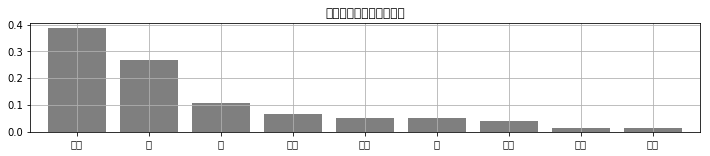

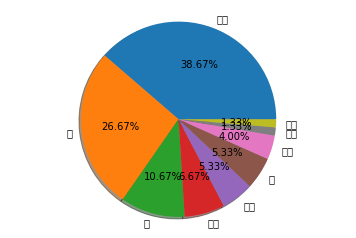

In [23]:
# 频率分布情况 - 定量字段
# ② 绘制频率直方图、饼图

plt.figure(num = 1,figsize = (12,2))
r_cx['频率'].plot(kind = 'bar',
                 width = 0.8,
                 rot = 0,
                 color = 'k',
                 grid = True,
                 alpha = 0.5)
plt.title('参考总价分布频率直方图')
# 绘制直方图

plt.figure(num = 2)
plt.pie(r_cx['频数'],
       labels = r_cx.index,
       autopct='%.2f%%',
       shadow = True)
plt.axis('equal')
# 绘制饼图